In [91]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [93]:
# function to load data in from file
def get_data(filename):
    # use a context manager to load in the data
    with open(filename, 'r', encoding='utf8') as rf:
        # transform file into string and split along new line
        lines = rf.read().split("\n")

        # separate each line along the tab characters
        data = [line.split("\t") for line in lines]

        # grab the header
        header = data[0]

        # delete header from data
        data = data[1:]
    
    # return header and data
    return header, data

In [98]:
# load data in from file
node_header, node_data = get_data('..//misk_skills/network_analysis/nodes.tsv')
edge_header, edge_data = get_data('../misk_skills/network_analysis/edges.tsv')

In [99]:
# create graph object
G = nx.Graph()

In [100]:
# add node information to the graph
for node in node_data:
    # add nodes one by one, with id, name, chinese name, and index year
    G.add_node(int(node[0]), name=node[1], cname=node[2], indexyear=int(node[3]))

In [101]:
# add edge information to the graph
for edge in edge_data:
    # add edge one by one, node 1, node 2, kin, and label
    G.add_edge(int(edge[0]), int(edge[1]), kin=edge[2], label=edge[3])

In [70]:
#df = pd.read_csv("us_edgelist.csv")
#G = nx.from_pandas_edgelist(df,source="From",target="To")

In [102]:
nx.info(G)

/tmp/ipykernel_4146/1064119803.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1594 nodes and 1758 edges'

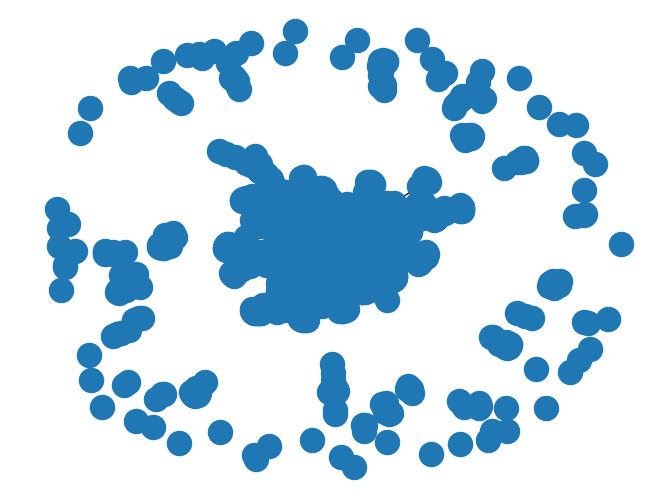

In [103]:
nx.draw_spring(G)

In [104]:
nodes = list(range(100))

df = pd.DataFrame({'from': np.random.choice(nodes, 100),
                   'to': np.random.choice(nodes,100)
                  })

In [105]:
df

,from,to
0,88,95
1,52,17
2,39,13
3,39,32
4,46,14
...,...,...
95,63,7
96,2,74
97,94,4
98,32,94


In [106]:
G = nx.from_pandas_edgelist(df, source='from', target='to')

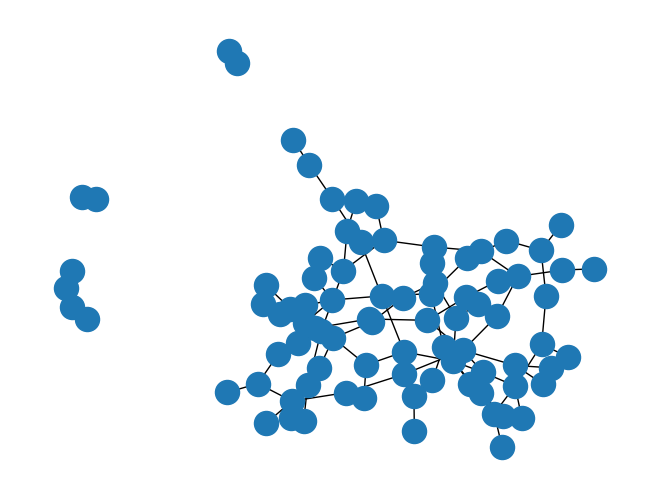

In [107]:
nx.draw(G);

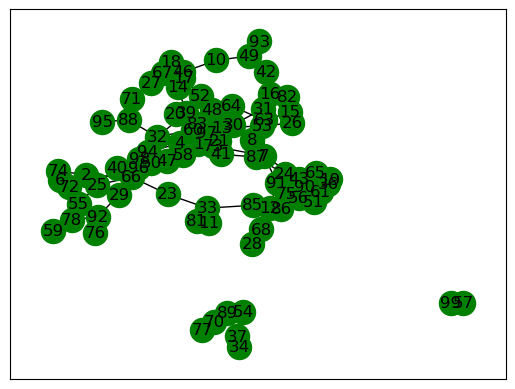

In [108]:
nx.draw_networkx(G,with_labels=True,node_color='g')
# nx.draw_networkx(G)

Measurments metrics:
- Degree.
- Closeness.
- Betweenness.

In [109]:
#number of edges the node has
nx.degree(G)

DegreeView({88: 3, 95: 1, 52: 3, 17: 3, 39: 4, 13: 4, 32: 5, 46: 3, 14: 4, 97: 2, 30: 4, 25: 4, 72: 2, 7: 4, 43: 4, 68: 2, 28: 1, 33: 4, 85: 3, 91: 4, 49: 3, 93: 1, 64: 3, 63: 4, 10: 2, 55: 2, 53: 2, 8: 2, 87: 3, 58: 2, 41: 3, 98: 1, 47: 3, 27: 2, 78: 3, 92: 3, 66: 5, 29: 2, 24: 4, 81: 1, 73: 4, 4: 3, 21: 3, 75: 4, 1: 2, 90: 3, 51: 2, 70: 2, 77: 1, 23: 2, 6: 2, 83: 3, 20: 1, 42: 2, 86: 2, 56: 2, 12: 2, 71: 2, 59: 1, 31: 2, 82: 1, 16: 2, 2: 3, 89: 2, 15: 1, 61: 2, 76: 1, 96: 2, 50: 2, 60: 2, 11: 1, 40: 2, 19: 2, 48: 2, 36: 1, 99: 1, 57: 1, 26: 1, 65: 2, 18: 1, 67: 1, 37: 1, 34: 1, 54: 1, 94: 3, 74: 1})

In [110]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{88: 0.03529411764705882,
 95: 0.011764705882352941,
 52: 0.03529411764705882,
 17: 0.03529411764705882,
 39: 0.047058823529411764,
 13: 0.047058823529411764,
 32: 0.058823529411764705,
 46: 0.03529411764705882,
 14: 0.047058823529411764,
 97: 0.023529411764705882,
 30: 0.047058823529411764,
 25: 0.047058823529411764,
 72: 0.023529411764705882,
 7: 0.047058823529411764,
 43: 0.047058823529411764,
 68: 0.023529411764705882,
 28: 0.011764705882352941,
 33: 0.047058823529411764,
 85: 0.03529411764705882,
 91: 0.047058823529411764,
 49: 0.03529411764705882,
 93: 0.011764705882352941,
 64: 0.03529411764705882,
 63: 0.047058823529411764,
 10: 0.023529411764705882,
 55: 0.023529411764705882,
 53: 0.023529411764705882,
 8: 0.023529411764705882,
 87: 0.03529411764705882,
 58: 0.023529411764705882,
 41: 0.03529411764705882,
 98: 0.011764705882352941,
 47: 0.03529411764705882,
 27: 0.023529411764705882,
 78: 0.03529411764705882,
 92: 0.03529411764705882,
 66: 0.058823529411764705,
 29: 0.02352941

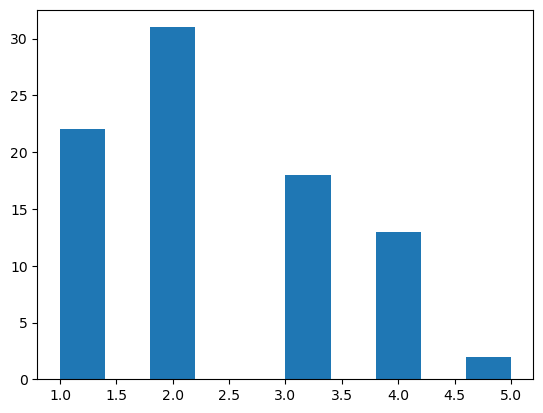

In [111]:
# degree distribution - a histogram of how many edges each node has-
plt.hist([v for k,v in nx.degree(G)]);

In [112]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{88: 0.04650860344137654,
 95: 0.0,
 52: 0.05567226890756302,
 17: 0.0246031746031746,
 39: 0.20826263838868883,
 13: 0.18360810991063092,
 32: 0.19615379485127382,
 46: 0.05078364679205015,
 14: 0.09336067760437505,
 97: 0.009061624649859946,
 30: 0.0782986527944511,
 25: 0.1230185407496332,
 72: 0.007282913165266106,
 7: 0.226765372815793,
 43: 0.07324329731892756,
 68: 0.021288515406162462,
 28: 0.0,
 33: 0.071655995731626,
 85: 0.05314659197012138,
 91: 0.1292690409497132,
 49: 0.032679738562091505,
 93: 0.0,
 64: 0.04722555688942244,
 63: 0.10562424969987995,
 10: 0.02474323062558357,
 55: 0.04598506069094304,
 53: 0.021288515406162462,
 8: 0.04799986661331199,
 87: 0.07999132986527943,
 58: 0.019537815126050413,
 41: 0.04731359210350808,
 98: 0.0,
 47: 0.12728824863278645,
 27: 0.005602240896358543,
 78: 0.04136321195144725,
 92: 0.03963585434173669,
 66: 0.1882012805122049,
 29: 0.03888888888888889,
 24: 0.09367346938775513,
 81: 0.0,
 73: 0.23788315326130463,
 4: 0.024948646125

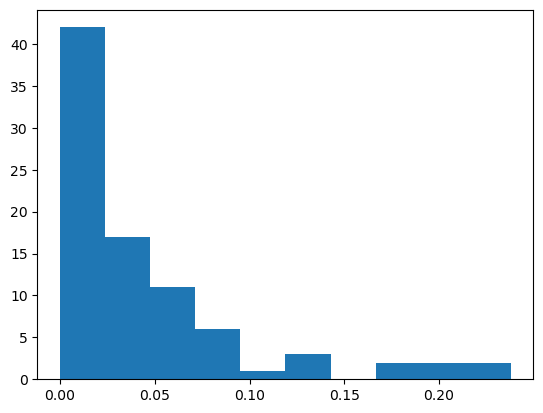

In [113]:
plt.hist(nx.centrality.betweenness_centrality(G).values());

In [114]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality

{88: 0.18024015807873536,
 95: 0.1506543005971287,
 52: 0.20159809588575314,
 17: 0.17222948438634714,
 39: 0.22869816779170687,
 13: 0.23725490196078433,
 32: 0.21662404092071613,
 46: 0.16529132980206301,
 14: 0.1926876828079298,
 97: 0.16412456747404844,
 30: 0.1811764705882353,
 25: 0.1959352280237938,
 72: 0.16297416162726772,
 7: 0.22869816779170687,
 43: 0.1926876828079298,
 68: 0.14382049727107338,
 28: 0.1243367935409458,
 33: 0.16848536516055698,
 85: 0.16607843137254902,
 91: 0.20576088842616694,
 49: 0.1447156455943373,
 93: 0.12500527092557454,
 64: 0.19538638985005768,
 63: 0.2027701778385773,
 10: 0.14872695346795434,
 55: 0.16568394578734105,
 53: 0.18954603580562662,
 8: 0.1807071014934471,
 87: 0.19704220671319375,
 58: 0.18024015807873536,
 41: 0.19986516096409912,
 98: 0.1757001037190695,
 47: 0.21729888216969032,
 27: 0.14778165503489532,
 78: 0.14968442312547336,
 92: 0.14715810374782823,
 66: 0.209468291821233,
 29: 0.15816993464052287,
 24: 0.1937581699346405,
 

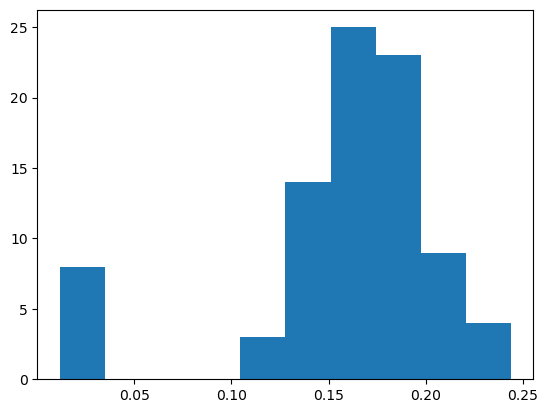

In [115]:
plt.hist(nx.centrality.closeness_centrality(G).values());

In [116]:
# network-level measures
# diameter: is the length of the shortest path between the most distanced nodes
# nx.diameter(G)

NetworkXError: Found infinite path length because the graph is not connected